In [1]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [4]:
scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [1]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

NameError: name 'datasets' is not defined

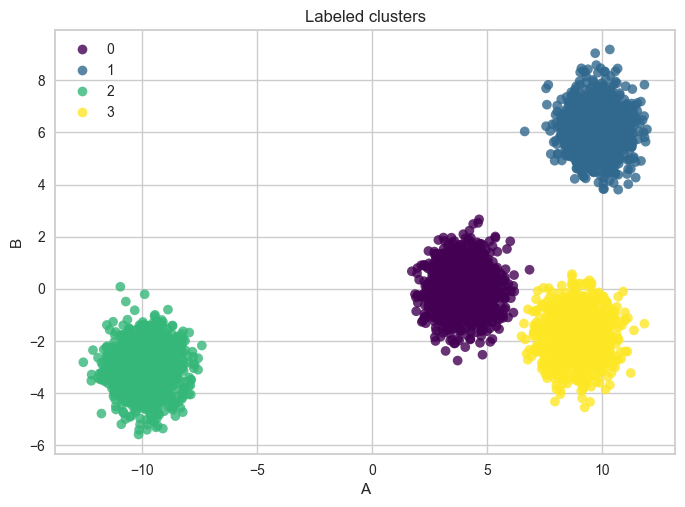

In [6]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [10]:
centroids, labels, inertia = k_means(X, n_clusters=4)

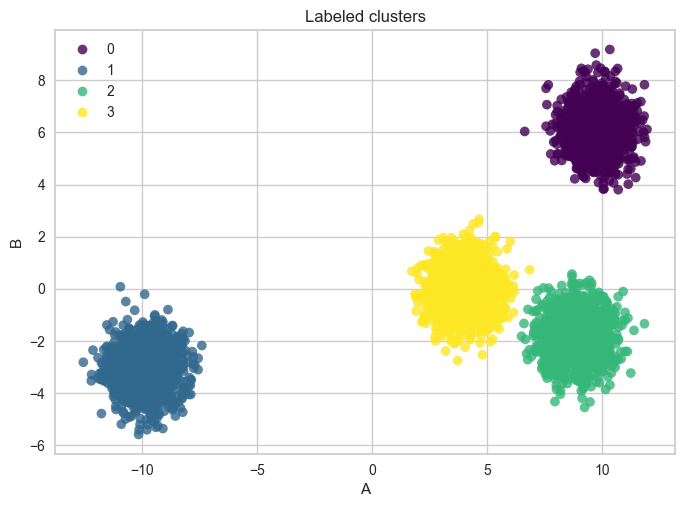

In [11]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [15]:
model = KMeans(n_clusters=4)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

In [17]:
centroids

array([[ 9.75724806,  6.14624833],
       [-9.81927284, -3.04022079],
       [ 3.99593986, -0.04078359],
       [ 8.91531677, -1.82008579]])

TypeError: Axes.scatter() got multiple values for argument 'ax'

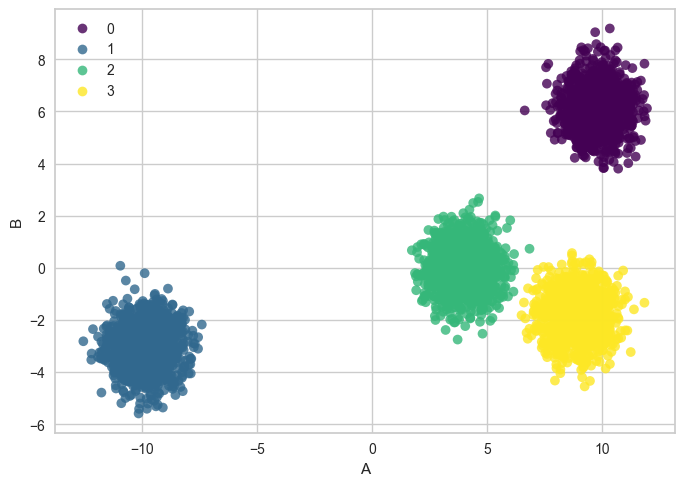

In [25]:
# Visualize simulated clusters
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(x=centroids[:,0], marker='*', y=centroids[:,1], s=500, palette='viridis', ax=ax, color='black')
plt.title('Labeled clusters')
plt.show()

In [29]:
# sklearn Metrics

silhouette_score(X, labels)
davies_bouldin_score(X, labels)
calinski_harabasz_score(X, labels)

95058.78532369215

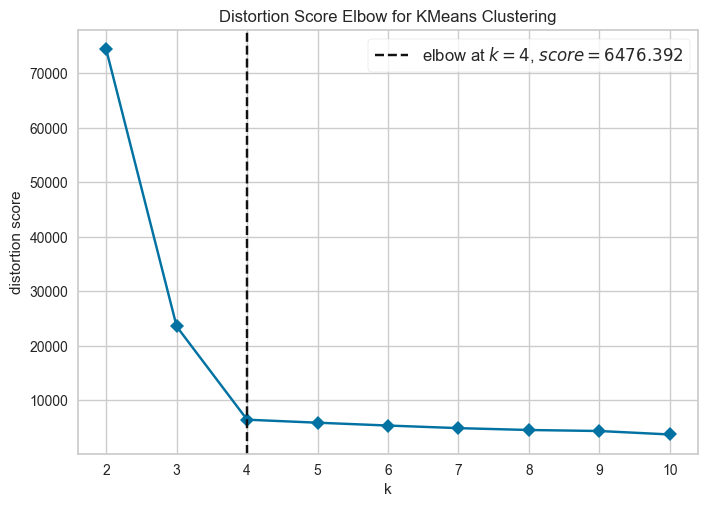

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [34]:
kelbow_visualizer(KMeans(), X, k=10, timings=False)

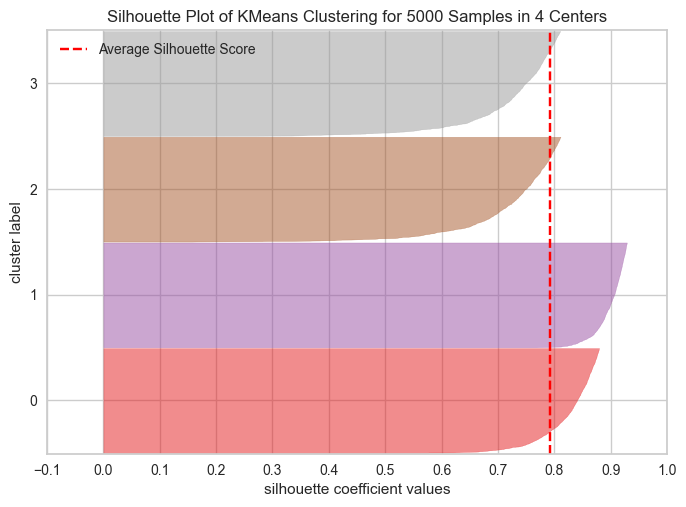

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [36]:
silhouette_visualizer(KMeans(n_clusters=4), X)

In [44]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(X)
    cluster_results_dict = {'k' : k}
    cluster_results_dict['inertia'] = model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(X, labels)
    cluster_metrics_results.append(cluster_results_dict)

cluster_results_dict

{'k': 10,
 'inertia': 3688.486215107636,
 'silhouette_score': 0.3174922736749293,
 'davies_bouldin_score': 1.0722715434221441,
 'calinski_harabasz_score': 56009.87093866592}

In [45]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,74397.037349,0.754150,0.294677,20272.121964
3,23580.257810,0.729833,0.394183,37357.850762
4,6476.391907,0.792622,0.294083,95058.785324
5,5934.506005,0.682652,0.649618,77912.941027
6,5410.273274,0.533987,0.941438,68459.554000
7,4906.509136,0.406535,1.132111,62984.599702
8,4387.773786,0.305648,1.261814,60444.298776
9,4041.674475,0.313609,1.150332,57446.261250
10,3688.486215,0.317492,1.072272,56009.870939


In [46]:
x_random = np.random.rand(*X.shape)
x_random

array([[0.51547862, 0.86595889],
       [0.71195682, 0.86000733],
       [0.6490188 , 0.58120873],
       ...,
       [0.44332942, 0.8208575 ],
       [0.08975704, 0.84933147],
       [0.19355127, 0.04621101]])

In [47]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(x_random)
    cluster_results_dict = {'k' : k}
    cluster_results_dict['inertia'] = model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(x_random, labels)
    cluster_metrics_results.append(cluster_results_dict)

cluster_results_dict

{'k': 10,
 'inertia': 85.13617340316381,
 'silhouette_score': 0.35599115247563556,
 'davies_bouldin_score': 0.8367361592838203,
 'calinski_harabasz_score': 4910.081039348114}

In [48]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,521.588171,0.355440,1.176611,3042.276723
3,333.539930,0.375501,0.868644,3787.026363
4,209.533791,0.406470,0.770758,5003.451703
5,179.721300,0.375761,0.894547,4581.411809
6,150.224853,0.371755,0.857247,4580.054037
7,127.644361,0.366516,0.811802,4638.288913
8,106.574422,0.364190,0.804877,4901.638398
9,92.638803,0.365558,0.787330,5026.913482
10,85.136173,0.355991,0.836736,4910.081039
